# Problem 1:


In [1]:
# Not allowed to use any sampling libraries/functions. 
# But you are allowed to use rand() call to generate a pseudo-uniform value in [0,1]
# can also use a library to compute pdf(x|params). 

import math
import random
import numpy as np
from collections import Counter

# from scipy.stats import pdf
# from scipy.stats import multivariate_normal as mvn

In [2]:
# A. Implement Simple Sampling from continuous distributions:
    # uniform (min, max, sample_size)
    # gaussian (mu, sigma, sample_size)

def uniform(min_val, max_val, sample_size):
    samples = []
    for _ in range(sample_size):
        sample = min_val + (max_val - min_val) * random.random()
        samples.append(sample)
    return samples

def gaussian(mu, sigma, sample_size):
    samples = []
    for _ in range(sample_size):
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        sample = mu + sigma * z0
        samples.append(sample)
    return samples


uniform_distr_samples = uniform(0, 1, 10000)
gaussian_distr_samples = gaussian(0, 1, 10000)

Text(0, 0.5, 'Frequency')

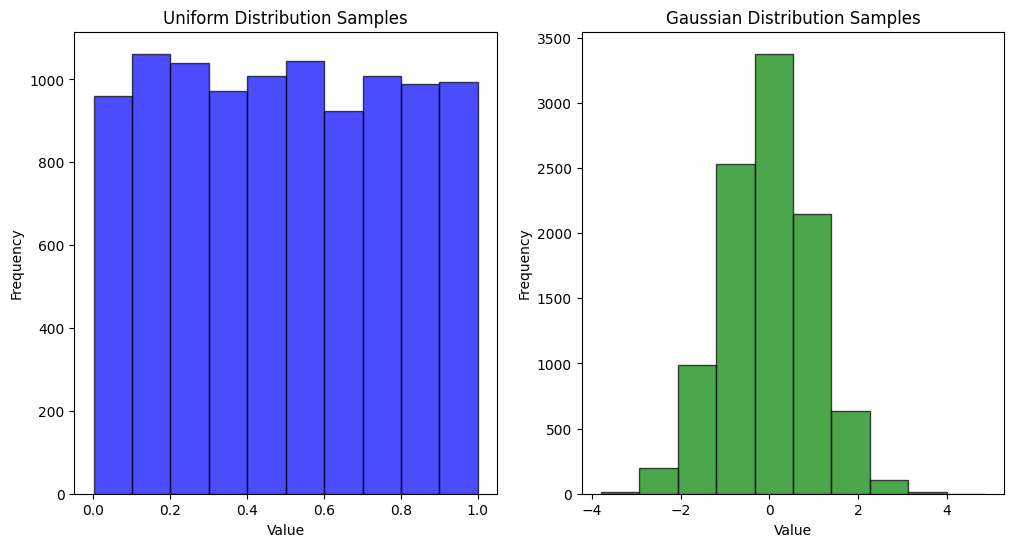

In [3]:
# plot them:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(uniform_distr_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Uniform Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(gaussian_distr_samples, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Gaussian Distribution Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')


100%|██████████| 100000/100000 [00:13<00:00, 7356.66it/s]


Generated samples: [[ 1.91515832  0.40888893]
 [ 2.6201781   1.215688  ]
 [ 2.417143    1.66453924]
 ...
 [ 2.56886949 -0.89839623]
 [ 0.3276684  -2.23216236]
 [-3.04747772  0.49635056]]
Number of accepted samples: 35260
Acceptance rate: 0.3526


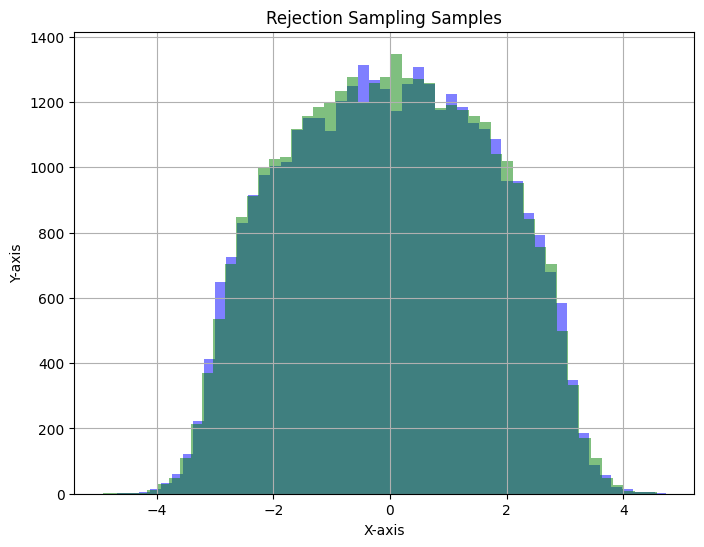

In [4]:
# Rejection Sampling from continuous distributions:
from scipy.stats import norm
from tqdm import tqdm
# B. Implement Rejection Sampling from continuous distributions:
    # 1.  random mu and sigma -> multivariate list of mu 1x2 and sigma 2x2
    # 2.  start with random discrete distribution (uniform) prior (A,B) -> lower bound, upper bound
        # A1 B1, A2,B2 where unif_1, unif_2 1x2 arrays
    # 3. how many samples to generate
    # 4. multivariate gaussian pdf(x|mu,sigma) -> max f(x)
        # begin loop for each sample
        # generate random sample from (unif_1, unif_2)
        # compute f(x) multivariate guassian pdf(x|mu,sigma)
        # compute g(x) is generator sample
        # acceptance ratio = f(x)/max(f(x) * g(x)
        # generate np.rand.rand() in [0,1] and compare with acceptance ratio
        # z if > or <= accept/reject
        # if accept, add to samples list


def rejection_sampling(mu, sigma, unif_1, unif_2, num_samples):
    samples = []
    max_pdf = norm.pdf(0, mu[0], sigma[0, 0]) * norm.pdf(0, mu[1], sigma[1, 1])
    
    for _ in tqdm(range(num_samples)):
        # Generate a random sample from the uniform distribution
        x = np.array([random.uniform(unif_1[0], unif_1[1]), random.uniform(unif_2[0], unif_2[1])])
        
        # Compute the PDF of the multivariate Gaussian at x
        pdf_x = norm.pdf(x[0], mu[0], sigma[0, 0]) * norm.pdf(x[1], mu[1], sigma[1, 1])
        
        # Compute the PDF of the generator (uniform distribution)
        g_x = 1 / ((unif_1[1] - unif_1[0]) * (unif_2[1] - unif_2[0]))
        
        # Compute the acceptance ratio
        acceptance_ratio = pdf_x / (max_pdf * g_x)
        
        # Generate a random number in [0, 1]
        z = random.random()
        
        # Accept or reject the sample
        if z <= acceptance_ratio:
            samples.append(x)
    
    return np.array(samples)

# Example parameters
mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])  # Identity covariance matrix
unif_1 = np.array([-5, 5])
unif_2 = np.array([-5, 5])
num_samples = 100000

samples = rejection_sampling(mu, sigma, unif_1, unif_2, num_samples)
print("Generated samples:", samples)
print("Number of accepted samples:", len(samples))
print("Acceptance rate:", len(samples) / num_samples)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.hist(samples[:, 0], bins=50, alpha=0.5, label='X-axis', color='blue')
plt.hist(samples[:, 1], bins=50, alpha=0.5, label='Y-axis', color='green')
plt.title('Rejection Sampling Samples')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [ ]:
# C. Implement without-replacement sampling from a discrete non-uniform distribution (given as input) following the Steven's method described in class ( paper ). 
    # Test it on desired sample sizes N significantly smaller than population size M (for example N=20 M=300)

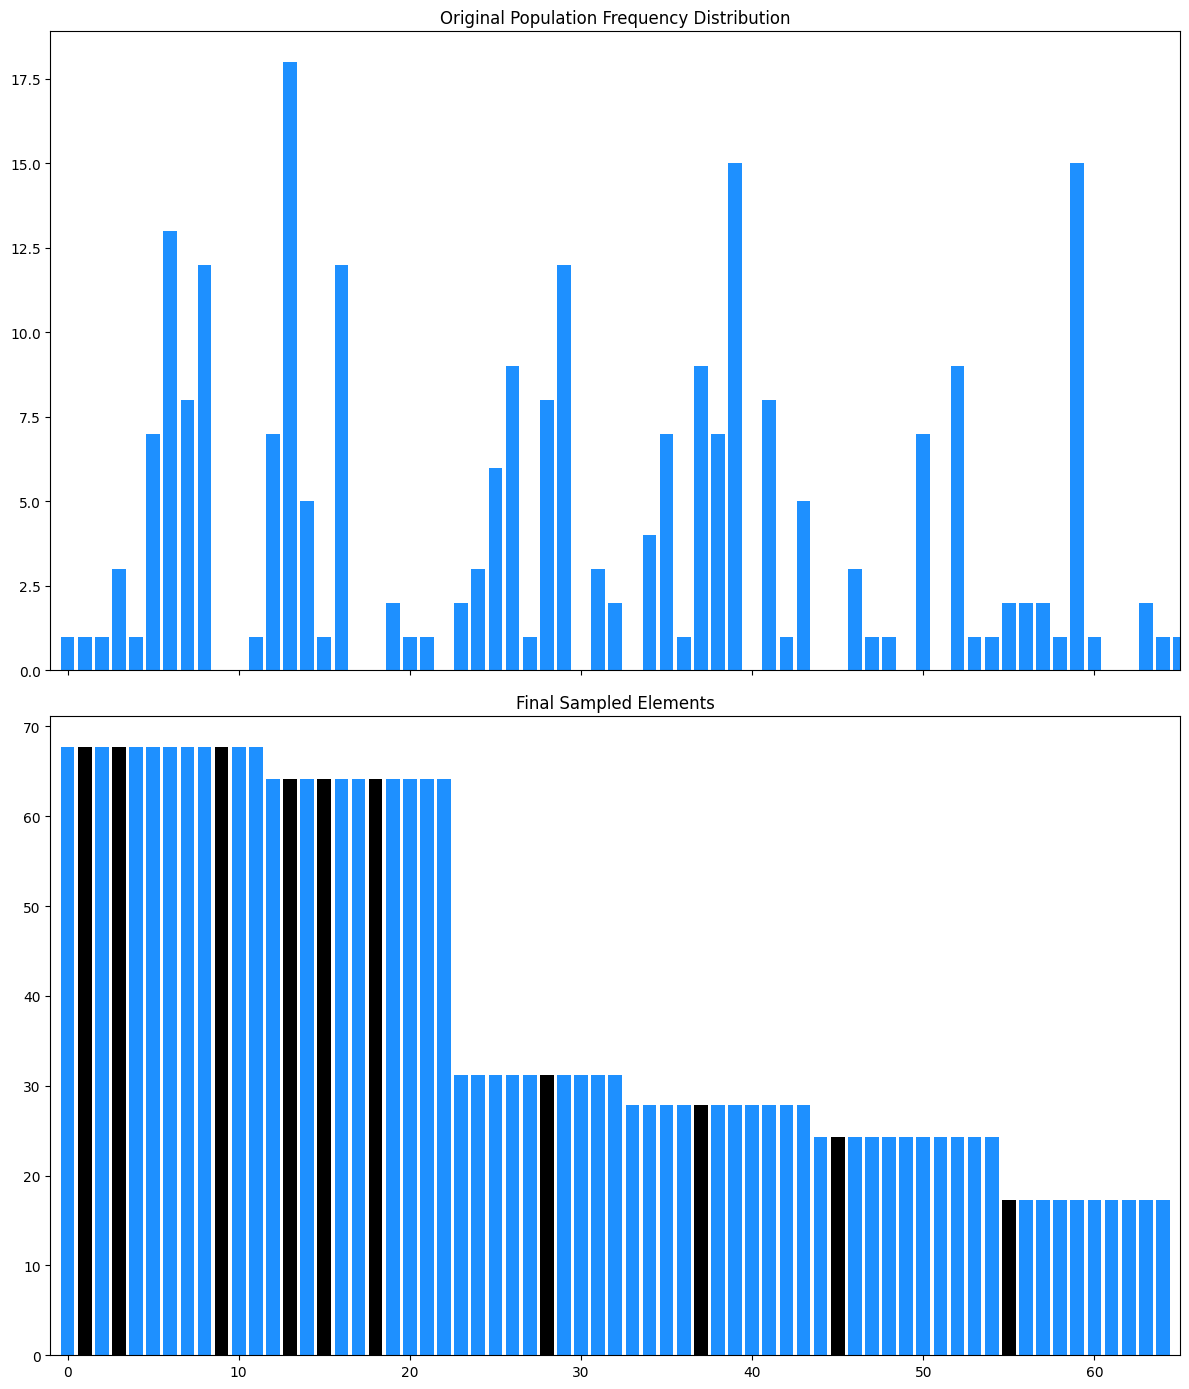

Sampled values: [1, 34, 3, 36, 65, 39, 42, 11, 77, 20]


In [28]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import random

def bucketize(population, num_buckets):
    min_val, max_val = min(population), max(population)
    width = (max_val - min_val + 1) / num_buckets
    buckets = [[] for _ in range(num_buckets)]
    for val in population:
        idx = min(int((val - min_val) / width), num_buckets - 1)
        buckets[idx].append(val)
    return buckets

def stevens_sampling(population, sample_size):

    # sort, bucketize
    sorted_pop = sorted(population)
    num_buckets = max(1, len(set(population)) // sample_size)
    buckets = bucketize(sorted_pop, num_buckets)
    
    value_counts = Counter(population)

    # original plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
    original_sorted_counts = sorted(value_counts.items())
    values, counts = zip(*original_sorted_counts)
    axs[0].bar(values, counts, color='dodgerblue')
    axs[0].set_title('Original Population Frequency Distribution')

    # reallocate "mass" within a bucket
    uniform_counts = {}
    for bucket in buckets:
        if not bucket:
            continue
        unique_vals = set(bucket)
        avg_freq = sum(value_counts[val] for val in bucket) / len(unique_vals)
        for val in unique_vals:
            uniform_counts[val] = avg_freq

    sorted_uniform = sorted(uniform_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_vals, sorted_freqs = zip(*sorted_uniform)

    # sample from buckets
    bucket_masses = []
    for bucket in buckets:
        mass = sum(uniform_counts.get(val, 0) for val in set(bucket))
        bucket_masses.append(mass)

    samples_per_bucket = [0] * len(buckets)
    total_mass = sum(bucket_masses)
    remaining_samples = sample_size

    for i in range(len(buckets)):
        if total_mass > 0:
            allocation = round((bucket_masses[i] / total_mass) * sample_size)
            samples_per_bucket[i] = min(allocation, len(set(buckets[i])), remaining_samples)
            remaining_samples -= samples_per_bucket[i]

    sorted_buckets = sorted(range(len(bucket_masses)), key=lambda i: bucket_masses[i], reverse=True)
    
    i = 0
    while remaining_samples > 0 and i < len(sorted_buckets):
        bucket_idx = sorted_buckets[i]
        unique_vals = set(buckets[bucket_idx])
        if samples_per_bucket[bucket_idx] < len(unique_vals):
            samples_per_bucket[bucket_idx] += 1
            remaining_samples -= 1
        else:
            i += 1

    # ensure no duplicates: 
    samples = set()
    for i, bucket in enumerate(buckets):
        n_samples = samples_per_bucket[i]
        if n_samples > 0:
            unique_vals = list(set(bucket) - samples)
            if unique_vals:
                sampled = random.sample(unique_vals, min(n_samples, len(unique_vals)))
                samples.update(sampled)

    if len(samples) < sample_size:
        remaining = list(set(population) - samples)
        if len(remaining) >= sample_size - len(samples):
            samples.update(random.sample(remaining, sample_size - len(samples)))

    # plot selected samples
    unique_sorted_vals = list(dict.fromkeys(sorted_vals))
    final_freqs = [uniform_counts.get(val, 0) for val in unique_sorted_vals]
    sampled_set = set(samples)

    axs[1].bar(range(len(unique_sorted_vals)), final_freqs, color='dodgerblue')
    for idx, val in enumerate(unique_sorted_vals):
        if val in sampled_set:
            axs[1].bar(idx, final_freqs[idx], color='black')

    axs[1].set_title('Final Sampled Elements')
    axs[1].set_xlim(-1, len(unique_sorted_vals))

    plt.tight_layout()
    plt.show()

    return list(samples)

# Run
sample_size = 10
population = np.random.choice(range(84), size=300, p=np.random.dirichlet(np.ones(84)))
samples = stevens_sampling(population, sample_size)
print("Sampled values:", samples)
